In [34]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [35]:
df = pd.read_csv('WTI.csv')

In [36]:
df.columns

Index(['Unnamed: 0', 'Date', 'AdjClose', 'Open', 'High', 'Low', 'Close',
       'Volume', 'avg7', 'avg10', 'avg50', 'avg100', 'avg200', 'avg253',
       'SPD_OPEN/CLOSE', 'SPD_HIGH/LOW', 'Adj_Close_Returns', 'Close_Returns',
       'Log_Returns', 'pos_string', 'count_pos_string', 'macd', 'signal',
       'hist', 'MACD_1DAY_strategy', 'MACD_9DAY_strategy',
       'MACD_CONVERGENCE_strategy', 'RSI', 'RSI_strategy', 'OBV', 'OBV_EMA',
       'OBV_strategy', 'TSF', 'TSF_strategy', 'WILLR', 'WILLR_strategy',
       'STOCH_K', 'STOCH_D', 'STOCH_K_strategy', 'STOCH_D_strategy', 'EMA',
       'TEMA', 'upperband', 'middleband', 'lowerband', 'MOM', 'stok', 'stod',
       'CCI', 'direction'],
      dtype='object')

In [37]:
#df = df[['AdjClose','avg10','macd','RSI','WILLR','Open','High','Low','avg7','SPD_OPEN/CLOSE','SPD_HIGH/LOW','macd','OBV','TSF','stok','stod','EMA','TEMA','upperband','middleband','lowerband', 'MOM','ROC','CCI','Turning_line', 'Standard_line', 'ichimoku_span1', 'ichimoku_span2']]
df = df[['Date','Log_Returns','AdjClose','avg10','macd','RSI','STOCH_K','STOCH_D','WILLR','direction']]

In [38]:
"""def classify(current, future):
    if float(future) > float(current):
        return 1
    else:
        return 0"""

'def classify(current, future):\n    if float(future) > float(current):\n        return 1\n    else:\n        return 0'

In [39]:
"""df['future'] = df['AdjClose'].shift(-1)
df['target'] = list(map(classify, df['AdjClose'], df['future']))
df.dropna(inplace=True)"""

"df['future'] = df['AdjClose'].shift(-1)\ndf['target'] = list(map(classify, df['AdjClose'], df['future']))\ndf.dropna(inplace=True)"

In [40]:
df

,Date,Log_Returns,AdjClose,avg10,macd,RSI,STOCH_K,STOCH_D,WILLR,direction
0,2000-10-12 00:00:00,0.085250,36.099998,32.236000,-0.012476,64.484941,65.747913,42.600955,-14.876069,1
1,2000-10-13 00:00:00,-0.029517,35.049999,32.655000,0.151673,59.255621,72.220210,59.955644,-32.231427,-1
2,2000-10-16 00:00:00,-0.057242,33.099998,32.750000,0.122996,50.986282,62.809884,66.926002,-64.462854,-1
3,2000-10-17 00:00:00,-0.004542,32.950001,32.838000,0.087161,50.403593,45.454525,60.161540,-66.942143,-1
4,2000-10-18 00:00:00,0.018046,33.549999,33.043000,0.105954,52.730684,37.190061,48.484823,-57.024819,1
...,...,...,...,...,...,...,...,...,...,...
5352,2022-02-07 00:00:00,-0.010783,91.320000,88.488999,3.439900,71.295083,87.129663,87.746851,-24.310092,-1
5353,2022-02-08 00:00:00,-0.021697,89.360001,88.864999,3.281094,63.497713,71.441108,82.208609,-50.065664,-1
5354,2022-02-09 00:00:00,0.003352,89.660004,89.096000,3.143213,64.144116,59.833601,72.801457,-46.123443,1
5355,2022-02-10 00:00:00,0.002451,89.879997,89.423000,3.016917,64.638633,53.236333,61.503680,-44.101896,1


In [41]:
df['direction'].value_counts()

 1    2814
-1    2543
Name: direction, dtype: int64

In [42]:
"""df = df.drop('future',axis=1)"""

"df = df.drop('future',axis=1)"

In [43]:
"""df_norm = df
def normalizeandscale(df_norm):
    for col in df_norm.columns:
        if col != 'target':
            df_norm[col] = preprocessing.scale(df_norm[col].values)
            df_norm[col] = df_norm[col]/df_norm[col].abs().max()
    return df_norm"""

"df_norm = df\ndef normalizeandscale(df_norm):\n    for col in df_norm.columns:\n        if col != 'target':\n            df_norm[col] = preprocessing.scale(df_norm[col].values)\n            df_norm[col] = df_norm[col]/df_norm[col].abs().max()\n    return df_norm"

In [44]:
#normalizeandscale(df_norm)

In [45]:
df_norm = df[['Log_Returns','AdjClose','avg10','macd','RSI','STOCH_K','STOCH_D','WILLR','direction']]
for col in df_norm.columns:
        if col != 'direction':
            df_norm[col]=(df_norm[col].values-np.min(df_norm[col]))/(np.max(df_norm[col])-np.min(df_norm[col]))
            df_norm.dropna(inplace=True)
            preprocessing.scale(df_norm[col].values)

df_norm

C:\Users\cosim\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\cosim\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\cosim\anaconda3\envs\tens\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,Log_Returns,AdjClose,avg10,macd,RSI,STOCH_K,STOCH_D,WILLR,direction
0,0.610555,0.403072,0.171030,0.675511,0.747265,0.881685,0.799298,0.974865,1
1,0.419861,0.397332,0.174208,0.686807,0.676686,0.904939,0.862950,0.945541,-1
2,0.373793,0.386672,0.174929,0.684834,0.565075,0.871129,0.888516,0.891081,-1
3,0.461359,0.385852,0.175596,0.682368,0.557211,0.808772,0.863706,0.886892,-1
4,0.498890,0.389132,0.177151,0.683661,0.588619,0.779079,0.820878,0.903649,1
...,...,...,...,...,...,...,...,...,...
5352,0.450990,0.704953,0.597735,0.913102,0.839181,0.958508,0.964882,0.958925,-1
5353,0.432855,0.694238,0.600587,0.902173,0.733941,0.902140,0.944569,0.915407,-1
5354,0.474475,0.695878,0.602339,0.892685,0.742665,0.860435,0.910066,0.922068,1
5355,0.472978,0.697081,0.604820,0.883993,0.749340,0.836732,0.868628,0.925484,1


In [46]:
df_norm.describe()

,Log_Returns,AdjClose,avg10,macd,RSI,STOCH_K,STOCH_D,WILLR,direction
count,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000,5357.000000
mean,0.469413,0.547204,0.399953,0.680936,0.571973,0.776281,0.776578,0.892563,0.050588
std,0.043568,0.138658,0.191860,0.119119,0.164899,0.148537,0.146607,0.076503,0.998813
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.448299,0.442926,0.256078,0.630032,0.463527,0.636994,0.636975,0.825267,-1.000000
50%,0.470671,0.532364,0.378560,0.693335,0.585964,0.792376,0.792493,0.900418,1.000000
75%,0.490800,0.651159,0.543916,0.751195,0.691362,0.917832,0.916262,0.963149,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
df_norm.drop('AdjClose',axis = 1, inplace=True)

C:\Users\cosim\anaconda3\envs\tens\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
df_norm

,Log_Returns,avg10,macd,RSI,STOCH_K,STOCH_D,WILLR,direction
0,0.610555,0.171030,0.675511,0.747265,0.881685,0.799298,0.974865,1
1,0.419861,0.174208,0.686807,0.676686,0.904939,0.862950,0.945541,-1
2,0.373793,0.174929,0.684834,0.565075,0.871129,0.888516,0.891081,-1
3,0.461359,0.175596,0.682368,0.557211,0.808772,0.863706,0.886892,-1
4,0.498890,0.177151,0.683661,0.588619,0.779079,0.820878,0.903649,1
...,...,...,...,...,...,...,...,...
5352,0.450990,0.597735,0.913102,0.839181,0.958508,0.964882,0.958925,-1
5353,0.432855,0.600587,0.902173,0.733941,0.902140,0.944569,0.915407,-1
5354,0.474475,0.602339,0.892685,0.742665,0.860435,0.910066,0.922068,1
5355,0.472978,0.604820,0.883993,0.749340,0.836732,0.868628,0.925484,1


In [49]:
times= sorted(df_norm.index.values)
"""last20_pct=sorted(df_norm.index.values)[-int(0.2*len(times))]
validation_df_norm=df_norm[(df_norm.index>=last20_pct)]
df_norm=df_norm[(df_norm.index<last20_pct)]"""
last30_pct=sorted(df_norm.index.values)[-int(0.3*len(times))]
test=df_norm[(df_norm.index>=last30_pct)]
train=df_norm[(df_norm.index<last30_pct)]

In [50]:
train.drop('Log_Returns', axis = 1, inplace = True)
test.drop('Log_Returns', axis = 1, inplace = True)

C:\Users\cosim\anaconda3\envs\tens\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
train

,avg10,macd,RSI,STOCH_K,STOCH_D,WILLR,direction
0,0.171030,0.675511,0.747265,0.881685,0.799298,0.974865,1
1,0.174208,0.686807,0.676686,0.904939,0.862950,0.945541,-1
2,0.174929,0.684834,0.565075,0.871129,0.888516,0.891081,-1
3,0.175596,0.682368,0.557211,0.808772,0.863706,0.886892,-1
4,0.177151,0.683661,0.588619,0.779079,0.820878,0.903649,1
...,...,...,...,...,...,...,...
3745,0.270892,0.684059,0.532848,0.769918,0.816007,0.819798,-1
3746,0.271370,0.691352,0.603469,0.743019,0.784012,0.905121,1
3747,0.271287,0.692229,0.571126,0.719858,0.743913,0.873155,-1
3748,0.271537,0.685324,0.522008,0.710814,0.723802,0.807039,-1


## HPELM

In [52]:
X_train = np.array(train.iloc[:,:-1])
y_train = np.array(train.iloc[:,-1])

X_test = np.array(test.iloc[:,:-1])
y_test = np.array(test.iloc[:,-1])

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import random

In [54]:
random.seed(1234)

In [55]:
"""from hpelm import HPELM
import matplotlib.pyplot as plt
loss_train=[]
loss_test=[]
acc_train=[]
acc_test=[]

ranger = range(5,400,5)

for i in ranger:
    elm = HPELM(X_train.shape[1], 1,'c', batch = 24)
    elm.add_neurons(i, "sigm") #tanh lavora peggio
    #elm.add_neurons(1, 'sigm')
    elm.train(X_train,y_train)
    y_predicted = elm.predict(X_train)
    y_predicted_test = elm.predict(X_test)
    y_pred = []
    for j in y_predicted:
        if j > np.mean(y_predicted):
            y_pred.append(1)
        else:
            y_pred.append(-1)

    y_pred_test = []
    for j in y_predicted_test:
        if j > np.mean(y_predicted_test):
            y_pred_test.append(1)
        else:
            y_pred_test.append(-1)
    print(f'\n model with {i} neurons')
    print('accuracy train: ', accuracy_score(y_train, y_pred))
    print('accuracy test: ', accuracy_score(y_test, y_pred_test))
    print('loss train: ', log_loss(y_train, y_pred))
    print('loss test: ', log_loss(y_test, y_pred_test))

    loss_train.append(log_loss(y_train, y_pred))
    loss_test.append(log_loss(y_test, y_pred_test))

    acc_train.append(accuracy_score(y_train, y_pred))
    acc_test.append(accuracy_score(y_test, y_pred_test))"""

'from hpelm import HPELM\nimport matplotlib.pyplot as plt\nloss_train=[]\nloss_test=[]\nacc_train=[]\nacc_test=[]\n\nranger = range(5,400,5)\n\nfor i in ranger:\n    elm = HPELM(X_train.shape[1], 1,\'c\', batch = 24)\n    elm.add_neurons(i, "sigm") #tanh lavora peggio\n    #elm.add_neurons(1, \'sigm\')\n    elm.train(X_train,y_train)\n    y_predicted = elm.predict(X_train)\n    y_predicted_test = elm.predict(X_test)\n    y_pred = []\n    for j in y_predicted:\n        if j > np.mean(y_predicted):\n            y_pred.append(1)\n        else:\n            y_pred.append(-1)\n\n    y_pred_test = []\n    for j in y_predicted_test:\n        if j > np.mean(y_predicted_test):\n            y_pred_test.append(1)\n        else:\n            y_pred_test.append(-1)\n    print(f\'\n model with {i} neurons\')\n    print(\'accuracy train: \', accuracy_score(y_train, y_pred))\n    print(\'accuracy test: \', accuracy_score(y_test, y_pred_test))\n    print(\'loss train: \', log_loss(y_train, y_pred))\n  

In [56]:
"""plt.title('loss')
plt.plot(ranger,loss_train, label='train')
plt.plot(ranger,loss_test, label = 'test')"""

"plt.title('loss')\nplt.plot(ranger,loss_train, label='train')\nplt.plot(ranger,loss_test, label = 'test')"

In [57]:
"""plt.title('accuracy')
plt.plot(ranger,acc_train, label = 'train')
plt.plot(ranger,acc_test, label = 'test')"""

"plt.title('accuracy')\nplt.plot(ranger,acc_train, label = 'train')\nplt.plot(ranger,acc_test, label = 'test')"

In [58]:
from hpelm import HPELM

elm = HPELM(X_train.shape[1], 1,'c', batch = 24)
elm.add_neurons(90, "sigm") #tanh lavora peggio
#elm.add_neurons(1, 'sigm')
elm.train(X_train,y_train)

In [59]:
y_predicted = elm.predict(X_train)
y_predicted_test = elm.predict(X_test)

In [60]:
#If OTS > Mean (OTS), predicted trend is up (1) else down (0).
y_pred = []
for i in y_predicted:
    if i > np.mean(y_predicted):
        y_pred.append(1)
    elif i == np.mean(y_predicted):
        y_pred.append(0)
    else:
        y_pred.append(-1)

y_pred_test = []
for i in y_predicted_test:
    if i > np.mean(y_predicted_test):
        y_pred_test.append(1)
    elif i == np.mean(y_predicted):
        y_pred_test.append(0)
    else:
        y_pred_test.append(-1)

In [61]:
print('accuracy train: ', accuracy_score(y_train, y_pred))
print('accuracy test: ', accuracy_score(y_test, y_pred_test))

accuracy train:  0.852
accuracy test:  0.8431860609831985


In [62]:
print('loss train: ', log_loss(y_train, y_pred))
print('loss test: ', log_loss(y_test, y_pred_test))

loss train:  5.111798183269607
loss test:  5.416220288745647


## Train

In [67]:
train_eval = pd.DataFrame(df['Log_Returns'])
train_eval.set_index(df.index)

,Log_Returns
0,0.085250
1,-0.029517
2,-0.057242
3,-0.004542
4,0.018046
...,...
5352,-0.010783
5353,-0.021697
5354,0.003352
5355,0.002451


In [68]:
train_eval = train_eval.loc[:3749]

In [69]:
train_eval

,Log_Returns
0,0.085250
1,-0.029517
2,-0.057242
3,-0.004542
4,0.018046
...,...
3745,-0.048492
3746,0.043790
3747,-0.018377
3748,-0.029899


In [70]:
train_eval['strat_hpelm'] = y_pred

In [71]:
train_eval['hpelm_Returns'] = train_eval['strat_hpelm']*train_eval['Log_Returns']

In [72]:
train_eval[['Log_Returns', 'hpelm_Returns']].sum().apply(np.exp)

Log_Returns      1.354751e+00
hpelm_Returns    5.187669e+24
dtype: float64

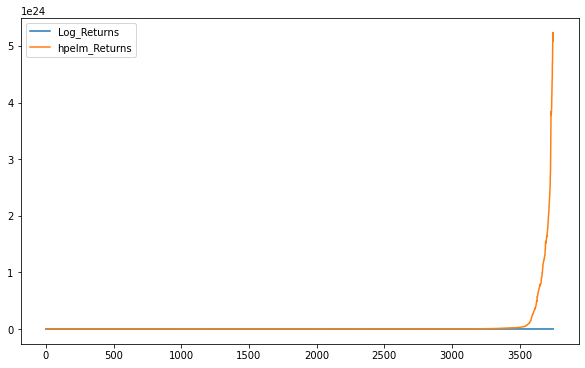

In [73]:
train_eval[['Log_Returns', 'hpelm_Returns']].cumsum().apply(np.exp).plot(figsize=(10, 6));

## Test

In [74]:
test_eval = pd.DataFrame(df['Log_Returns'])
test_eval.set_index(df.index)

,Log_Returns
0,0.085250
1,-0.029517
2,-0.057242
3,-0.004542
4,0.018046
...,...
5352,-0.010783
5353,-0.021697
5354,0.003352
5355,0.002451


In [75]:
test_eval = test_eval.loc[3750:]

In [76]:
test_eval

,Log_Returns
3750,0.017438
3751,-0.028183
3752,0.017846
3753,-0.003100
3754,-0.007793
...,...
5352,-0.010783
5353,-0.021697
5354,0.003352
5355,0.002451


In [77]:
test_eval['strat_hpelm'] = y_pred_test

In [78]:
test_eval['hpelm_Returns'] = test_eval['strat_hpelm']*test_eval['Log_Returns']

In [79]:
test_eval[['Log_Returns', 'hpelm_Returns']].sum().apply(np.exp)

Log_Returns      3.783651e+00
hpelm_Returns    1.934474e+10
dtype: float64

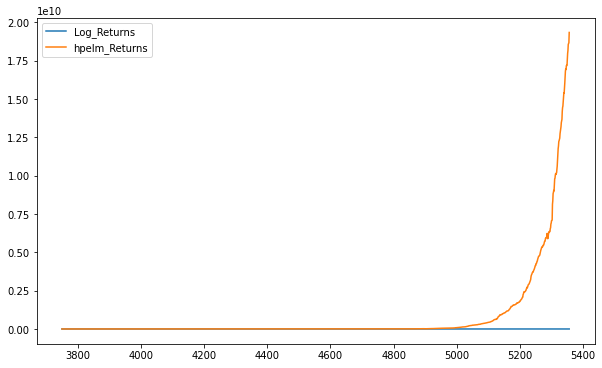

In [80]:
test_eval[['Log_Returns', 'hpelm_Returns']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [81]:
output = df[['Date','Log_Returns','AdjClose']]

In [82]:
output

,Date,Log_Returns,AdjClose
0,2000-10-12 00:00:00,0.085250,36.099998
1,2000-10-13 00:00:00,-0.029517,35.049999
2,2000-10-16 00:00:00,-0.057242,33.099998
3,2000-10-17 00:00:00,-0.004542,32.950001
4,2000-10-18 00:00:00,0.018046,33.549999
...,...,...,...
5352,2022-02-07 00:00:00,-0.010783,91.320000
5353,2022-02-08 00:00:00,-0.021697,89.360001
5354,2022-02-09 00:00:00,0.003352,89.660004
5355,2022-02-10 00:00:00,0.002451,89.879997


In [83]:
output_test = pd.merge(output, test_eval, left_index = True, right_index=True)
output_test.drop(['AdjClose','Log_Returns_y','hpelm_Returns'], axis=1,inplace= True)
output_test.rename({'Log_Returns_x':'Log_Returns'},axis=1,inplace=True)
output_test.set_index('Date', inplace=True)


In [84]:
output_train = pd.merge(output, train_eval, left_index = True, right_index=True)
output_train.drop(['AdjClose','Log_Returns_y','hpelm_Returns'], axis=1,inplace= True)
output_train.rename({'Log_Returns_x':'Log_Returns'},axis=1,inplace=True)
output_train.set_index('Date', inplace=True)

In [85]:
output_train

,Log_Returns,strat_hpelm
Date,,
2000-10-12 00:00:00,0.085250,1
2000-10-13 00:00:00,-0.029517,-1
2000-10-16 00:00:00,-0.057242,-1
2000-10-17 00:00:00,-0.004542,-1
2000-10-18 00:00:00,0.018046,1
...,...,...
2015-09-18 00:00:00,-0.048492,-1
2015-09-21 00:00:00,0.043790,1
2015-09-22 00:00:00,-0.018377,1


In [86]:
output_test

,Log_Returns,strat_hpelm
Date,,
2015-09-25 00:00:00,0.017438,1
2015-09-28 00:00:00,-0.028183,-1
2015-09-29 00:00:00,0.017846,1
2015-09-30 00:00:00,-0.003100,1
2015-10-01 00:00:00,-0.007793,-1
...,...,...
2022-02-07 00:00:00,-0.010783,-1
2022-02-08 00:00:00,-0.021697,-1
2022-02-09 00:00:00,0.003352,1


In [87]:
output_train.to_csv('WTI_strategy_hpelm_train.csv')

In [88]:
output_test.to_csv('WTI_strategy_hpelm_test.csv')